Importing Libraries

In [1]:
import cv2
from tkinter import *
from PIL import ImageGrab
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split
from emnist import extract_training_samples, extract_test_samples

Loading and splitting the data

In [2]:
x_train, y_train = extract_training_samples('letters')
x_test, y_test = extract_test_samples('letters')
print(type(x_train))

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(len(x_train))
print(len(x_test))

<class 'numpy.ndarray'>
99840
24960


Normalizing the data

In [3]:
x_train = x_train / 255.0  
x_test = x_test / 255.0

y_train = y_train - 1  
y_test = y_test - 1

Creating ANN layers

In [4]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(26, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

Fitting the model

In [5]:
model.fit(x_train,y_train,epochs=11)
model.save('alphabets.model')

Epoch 1/11
3120/3120 [==============================] - 26s 8ms/step - loss: 0.6744 - accuracy: 0.7943
Epoch 2/11
3120/3120 [==============================] - 25s 8ms/step - loss: 0.3557 - accuracy: 0.8856
Epoch 3/11
3120/3120 [==============================] - 24s 8ms/step - loss: 0.2913 - accuracy: 0.9042
Epoch 4/11
3120/3120 [==============================] - 24s 8ms/step - loss: 0.2525 - accuracy: 0.9163
Epoch 5/11
3120/3120 [==============================] - 24s 8ms/step - loss: 0.2287 - accuracy: 0.9224
Epoch 6/11
3120/3120 [==============================] - 24s 8ms/step - loss: 0.2056 - accuracy: 0.9294
Epoch 7/11
3120/3120 [==============================] - 25s 8ms/step - loss: 0.1890 - accuracy: 0.9344
Epoch 8/11
3120/3120 [==============================] - 25s 8ms/step - loss: 0.1752 - accuracy: 0.9384
Epoch 9/11
3120/3120 [==============================] - 25s 8ms/step - loss: 0.1660 - accuracy: 0.9421
Epoch 10/11
3120/3120 [==============================] - 26s 8ms/step - l

INFO:tensorflow:Assets written to: alphabets.model\assets


Evaluating the model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

780/780 [==============================] - 1s 1ms/step - loss: 0.3442 - accuracy: 0.9119
Test Loss: 0.3442, Test Accuracy: 0.9119


Launch GUI

1/1 [==============================] - 0s 72ms/step
				  The letter is probably:
						' A '


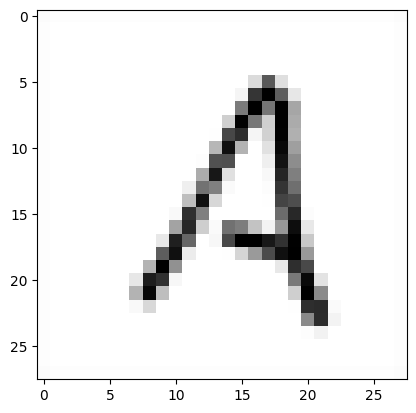

In [7]:
drawing = False
canvas = None
brush_size=16

def draw(event):
    global drawing
    if drawing:
        x, y = event.x, event.y
        canvas.create_oval(x, y, x+brush_size, y+brush_size, fill='black', outline='black')

def brush_size_adjust(event):
    global brush_size
    if event.delta>0:
        brush_size+=4
    else:
        brush_size-=4

    canvas.delete("brush_size_text")
    canvas.create_text(10, 10, text=brush_size, fill='black', width=100, tags="brush_size_text")

def start(event):
    global drawing
    drawing = True

def stop(event):
    global drawing
    drawing = False

def get_image():
    window.update()
    x = window.winfo_rootx() + canvas.winfo_x()
    y = window.winfo_rooty() + canvas.winfo_y()
    x1 = x + canvas.winfo_width()
    y1 = y + canvas.winfo_height()
    img = ImageGrab.grab().crop((x, y, x1, y1))
    img = img.resize((28, 28))
    img = img.convert('L')
    img = np.array(img)
    img = np.invert(img)
    img = img / 255.0
    return img

def predict():
    img = get_image()
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    recognized_character = chr(predicted_label + ord('A'))
    print("\t\t\t\t  The letter is probably:\n\t\t\t\t\t\t'", recognized_character, "'")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
    clear_canvas()

def clear_canvas():
    canvas.delete("all")

window = Tk()
window.title("Draw a letter.")
canvas = Canvas(window, width=300, height=300, bg="white")
canvas.pack()
canvas.bind("<B1-Motion>", draw)
canvas.bind("<ButtonPress-1>", start)
canvas.bind("<ButtonRelease-1>", stop)
canvas.bind("<MouseWheel>", brush_size_adjust)

predict_button = Button(window, text="PREDICT", command=predict)
predict_button.pack()

output_label = Label(window, text="")
output_label.pack()

window.mainloop()